# Ocean Recharge Oscillator
## A reduced coupled model for ENSO illustrating the effects of nonlinearity and forcing, based on the model of Fei-Fei Jin (1997)


Start by stating the problem and the fundamental equations, but do not include lengthy background material or a literature review. The emphasis is on the scientific justification of your method to solve this problem numerically and the accuracy and interpretation of the results. Follow the structure that we discussed in Lecture 1: formulation, implemen- tation, evaluation.

Describe scheme used and why 
LIST PARAMETERS 

$$b=b_0 \mu $$
$$ R = \gamma b - c $$

Equations:
$$ \frac{dT}{dt} = RT + \gamma h - \epsilon (h+bT)^{3} + \gamma \xi $$
$$ \frac{dh}{dt} = -rh -\alpha bT - \alpha \xi $$



## Choice of Numerical Method



To simulate the system accurately, the numerical method and analytic system should share stability properties. 

### Analytic Stability

The stability of the analytic system is considered first. Writing equations ? in matrix form as :

$$ \frac{d}{dt} \begin{pmatrix} T \\ h \end{pmatrix} = M \begin{pmatrix} T \\ h \end{pmatrix} $$

with $$M = \begin{pmatrix} R & \gamma \\  -\alpha b & -r \end{pmatrix}$$

M can be diagonalised using new variables, $\hat T, \hat h $ giving a new matrix $M'$ from which eigenvalues, $\lambda _j + i\omega_j$, can be calculated, where $\lambda_j$ are the real part of the eigenvalues and $\omega_j$ are the imaginary components. These equations are hence decoupled and the eigenvectors are proportional to $e^{\lambda _j t} e^{i \omega_j t} $. 

Hence, for a timestep $\delta t$, the phase of the solution is changed by $\omega_j \delta t$ and the amplitude by $\lambda_j \delta t$. For a decaying system, $\lambda_j<0$, a growing system $\lambda_j>0$ and for a system of constant amplitude $\lambda_j=0$.

The eigenvalues of this matrix are then :
PLOT

... REFERENCE PL VIDALE.

Then amplification factor =1 when mu = 2/3


### Numerical Stability 
For a numerical method, the amplification factor, $A$ is defined as <cite data-cite="durran">(durran, year)</cite>:

$$ w^{n+1} = A w^{n} $$

<cite data-cite="durran">(Durran,year???)</cite>

for some quantity of interest $w$. Hence $w$ grows with time if $|A|>1$, decays with time if $|A|<1$ or is neutrally stable if $|A|=1$. A suitable numerical scheme should have the same stability properties as the system, governed by $\lambda_j$.

In this case, the scheme should be neutrally stable when $\mu = \frac{2}{3}$, amplifying when $\mu > \frac{2}{3}$ and decaying when $\mu < \frac{2}{3}$.



The method chosen was Runga-Kutta 4th Order based on <cite data-cite="something">(SOME CITATION, year)</cite>
This scheme is known to accurately represent oscillations growth and decay.

## Task A
First test with T0=0.125 and h0=0 for 1 period T=42

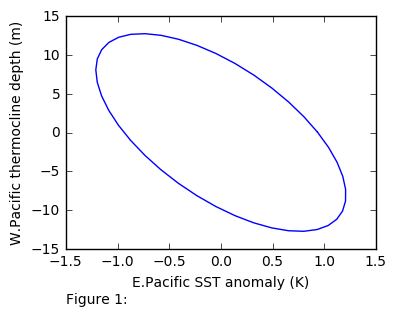

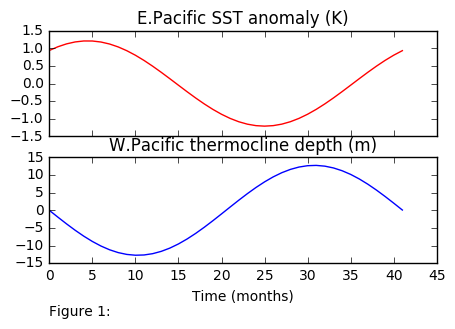

In [1]:
from parameters import *    # Imports all fixed parameters for this project
from plot import *
from schemes import *

T,h = rk4(T0=0.125, h0=0., mu0=2./3., nt=42)

phase1=phase_plot(T,h)
phase1.set_size_inches(4,3)
plt.text(-1.5, -22,'Figure 1:')

time1=time_plot(T,h)
time1.set_size_inches(5,3)
plt.text(0., -30,'Figure 1:')

plt.show()



As described above, analytically the equations should give rise to stable oscillations when $\mu=\frac{2}{3}$. Figure 1 shows an oscillation in phase-space, the trajectory makes a complete cycle and returns to the same point. Therefore it will continue this indefinitely. This can be checked by increasing the number of timesteps (e.g. to 100 cycles). Since the trajectory does not change over long periods, it can be assumed that the  RK4 method is stable in this case. This could be shown more robustly by calculating the eigenvalues for which is the scheme is stable CITE PIERLUIGI




## Task B


The model is now run for 5 periods (205 timesteps) and $\mu$ is decreased to below the critical value. This is the subcritical regime <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. In figure ? below, $\mu=0.5$.

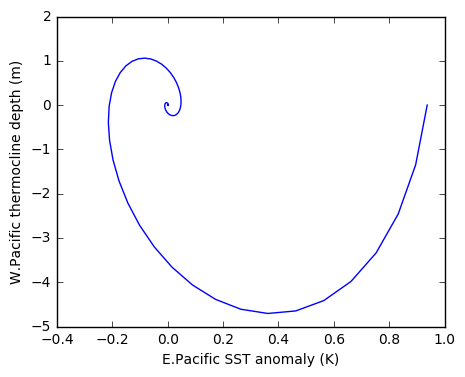

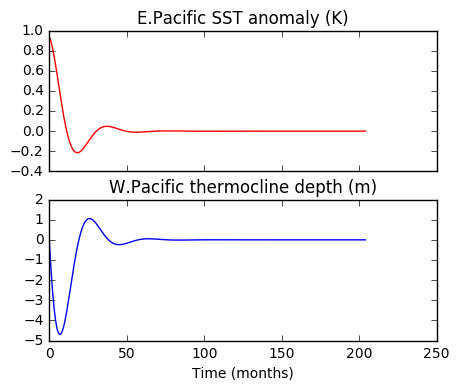

In [2]:
T,h = rk4(T0=0.125, h0=0., mu0=0.5, nt=205)
phase2=phase_plot(T,h)
time2=time_plot(T,h)

phase2.set_size_inches(5,4)
time2.set_size_inches(5,4)
plt.show()

Figure ? shows that when $\mu < \frac{2}{3} $, the oscillations are damped out. This implies the amplification factor $|A|<1$ for the RK4 method. This is how the analytic equations ? should behave when $\mu < \frac{2}{3} $, as described above and shown in fig ? . 

The RK4 method for the recharge oscillator is then tested with $\mu>\frac{2}{3}$, the supercritical regime <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. In this example, $\mu=0.75$ is chosen.

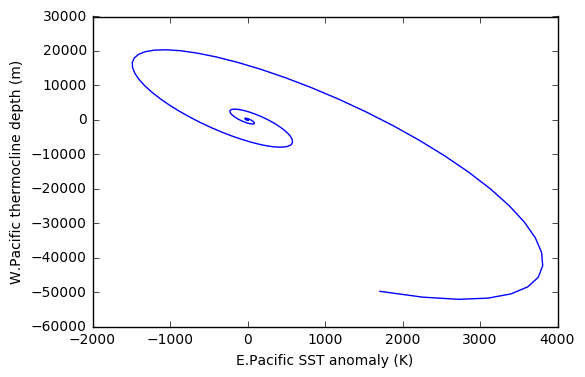

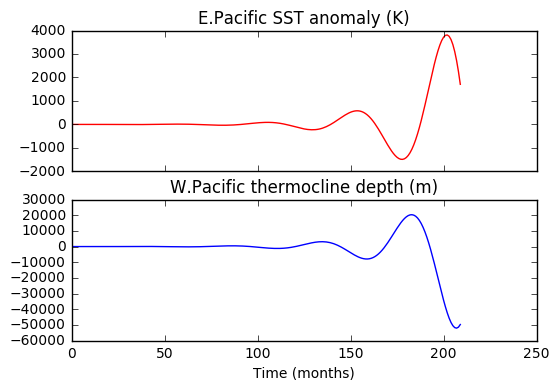

In [3]:
T,h = rk4(T0=0.125, h0=0., mu0=0.75, nt=210)
phase3=phase_plot(T,h)
time3=time_plot(T,h)

plt.show()

When $\mu > \frac{2}{3} $, there is exponential growth in T and h in equations ? **CHECK THIS- DOES NOT AGREE WITH WHAT I WROTE EARLIER, should h be pos and T neg??? ** The RK4 method used to solve these equations also shows an unstable mode in figure ?, suggesting that the amplification factor $|A|>1$. This shows that the method correctly represents the equations in this regime as well. 

Jin shows that the amplitude of the growth should be limited by non-linear terms in equations ?. This is investigated in the next section by allowing $\epsilon$ to be non-zero <cite data-cite="Jin1997a">(Jin, 1997a)</cite>.




# Task C

non linearity: add epsilon=0.1

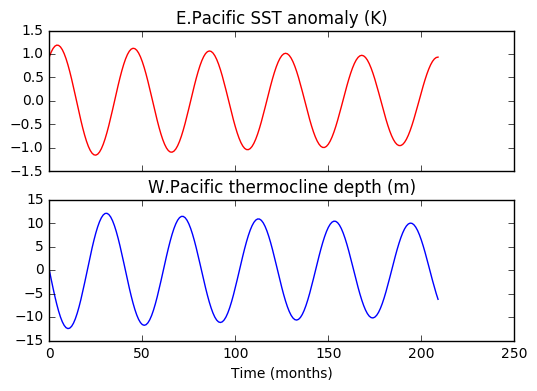

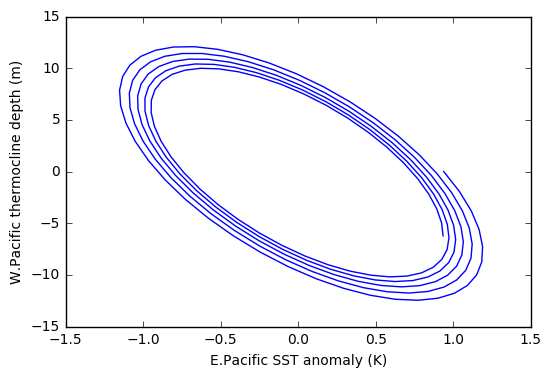

In [4]:
T,h=rk4(T0=0.125, h0=0., mu0=2./3., nt=210, epsilon=0.1)
time4=time_plot(T,h)
phase4=phase_plot(T,h)

plt.show()

For $\mu= \frac{2}{3}$, the non-linear term adds a slight damping to the system, shown by comparing the decreasing amplitude of $T$ and $h$ in figure ?. ??? WHAT DOES THIS REPRESENT
Increasing $\mu$ to 0.75 no longer shows the exponential growth in the amplitude of oscillations in figure ? below. This is in agreement with Jin who showed that the amplitude of the growth should be limited by non-linear terms in equations <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. 


The amplitude of oscillations does not depend on the initial conditions. This can be tested by changing the initial condition for $T0$. This known as 'Self-excitation' of the recharge oscillator <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. 



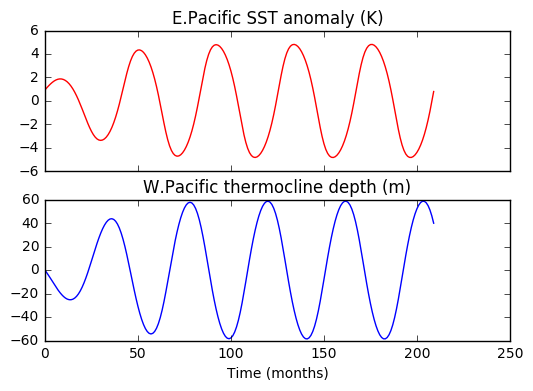

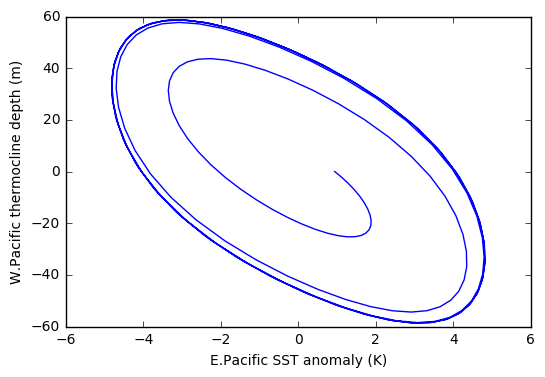

In [5]:
T,h=rk4(T0=0.125, h0=0., mu0=0.75, nt=210, epsilon=0.1)
    
time_plot(T,h)
phase_plot(T,h)
plt.show()

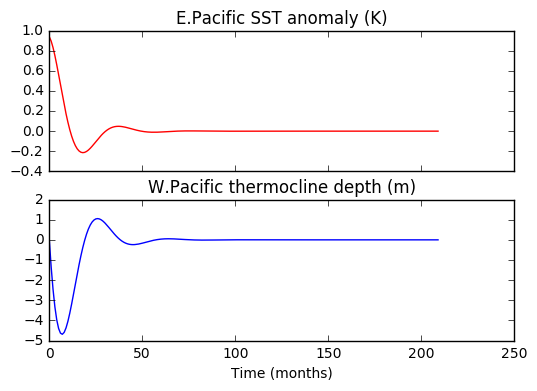

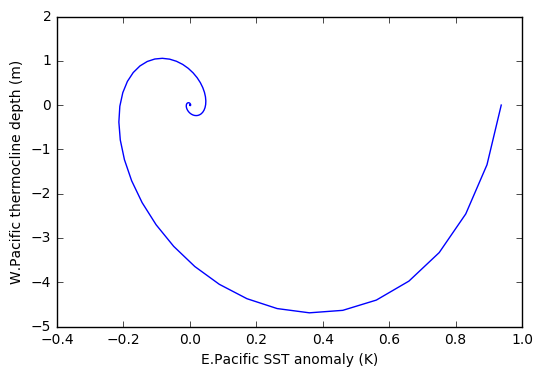

In [6]:
T,h=rk4(T0=0.125, h0=0., mu0=0.5, nt=210, epsilon=0.1)
    
time_plot(T,h)
phase_plot(T,h)

plt.show()

However, decreasing $/mu$ to 0.5 gives similar to results to figure ?, where the oscillations are quickly damped out, even with the non-linear term. Jin shows that the oscillations can be excited by a stochastic forcing by adding in wind stress and heat flux forcings <cite data-cite="Jin1997a">(Jin, 1997a)</cite>. The addition of wind stress, $\xi$ in equation ? is considered in section ???.  

# Task D
include annual frequency for mu
set mu_ann=0.2

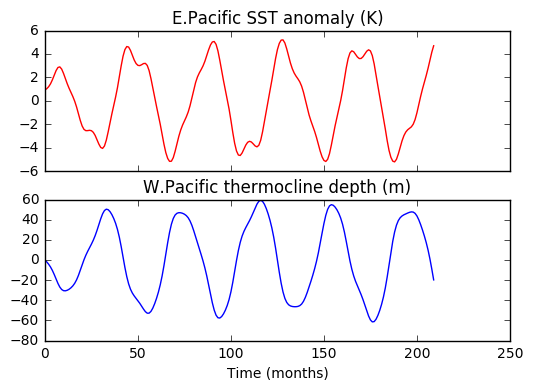

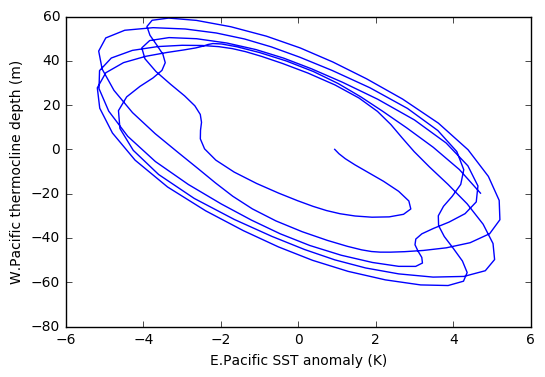

In [7]:
T,h=rk4(T0=0.125, h0=0., mu0=0.75, nt=210, epsilon=0.1, mu_ann=0.2)
time_plot(T,h)
phase_plot(T,h)
plt.show()

# Task E
add wind stress forcing

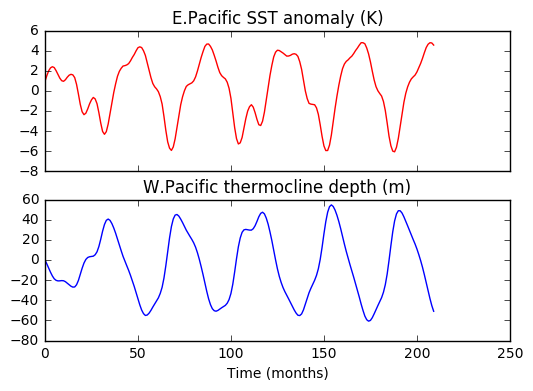

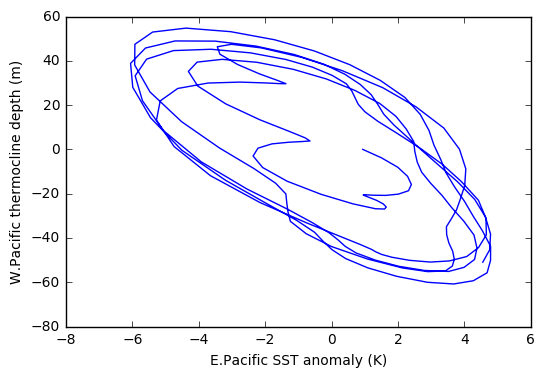

In [8]:
T,h=rk4(T0=0.125, h0=0., mu0=0.75, nt=210, epsilon=0.1, mu_ann=0.2, f_ann=0.02, f_ran=0.2)
time_plot(T,h)
phase_plot(T,h)

plt.show()


can check effects of annual forcing and random forcing separately:

Annual forcing
Random forcing


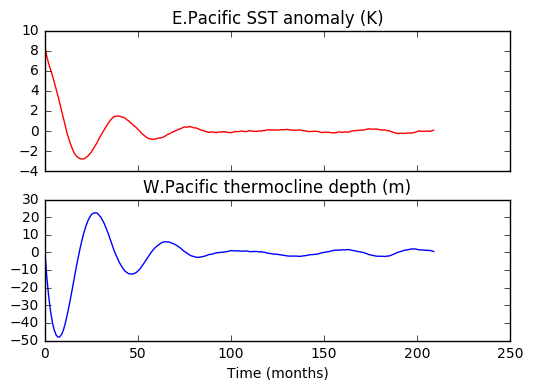

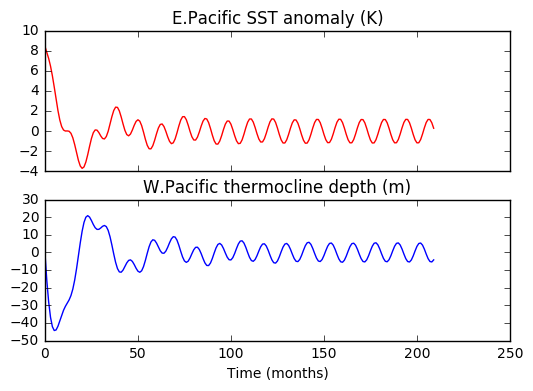

In [9]:
print('Annual forcing')

T,h=rk4(T0=1.125, h0=0., mu0=0.6, nt=210, epsilon=0.1, mu_ann=0., f_ann=0.02, f_ran=0.)
time_plot(T,h)

print('Random forcing')

T,h=rk4(T0=1.125, h0=0., mu0=0.6, nt=210, epsilon=0.1, mu_ann=0., f_ann=0.0, f_ran=0.2)
time_plot(T,h)

plt.show()


Check stochastic excitation due to f_ran and see Jin paper stochastic part

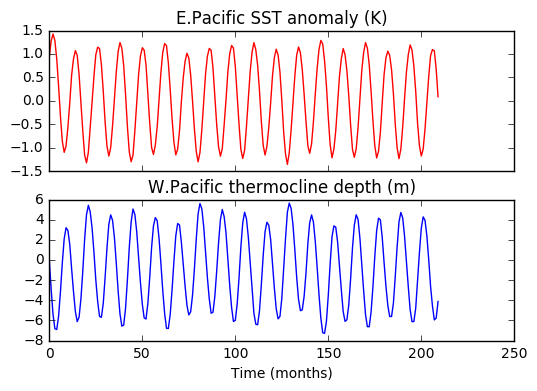

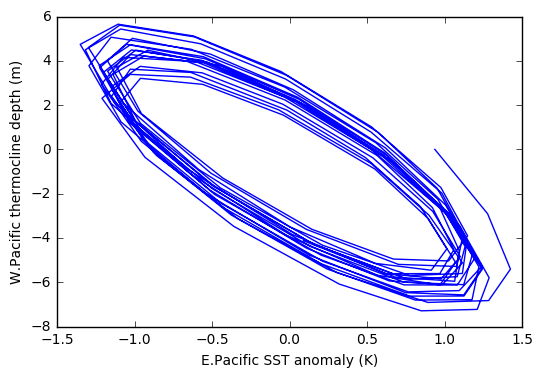

In [10]:
T,h=rk4(T0=0.125, h0=0., mu0=0.5, nt=210, epsilon=0.1, mu_ann=0.2, f_ann=0.02, f_ran=0.2)
time_plot(T,h)
phase_plot(T,h)

plt.show()

Now oscillation does not die out - stochastic excitation is seen instead cite Jin

# Task F:
Ensembles

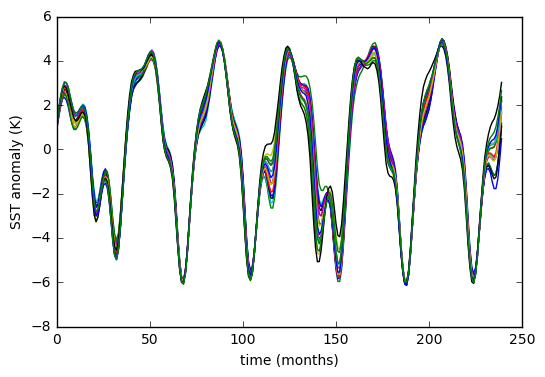

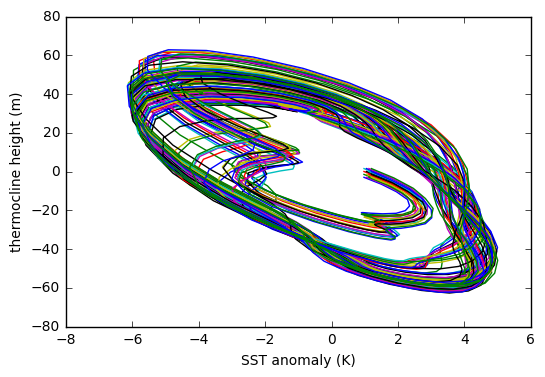

In [12]:
from ensemble import *

ensemble(Tmid=0.15,hmid=0.0,dT=0.01,dh=0.01,mu0=0.75,nt=240,f_ann=0.02,f_ran=0.2,epsilon=0.1,mu_ann=0.2)



not chaotic

can you make it chaotic


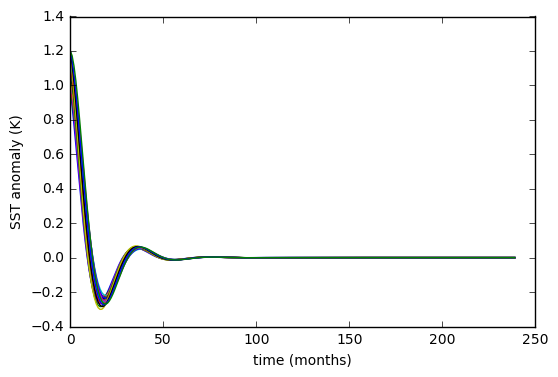

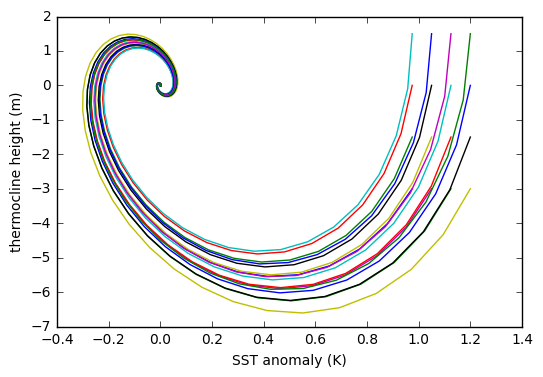

In [13]:
ensemble(Tmid=0.15,hmid=0.0,dT=0.01,dh=0.01,mu0=0.5,nt=240,f_ann=0.0,f_ran=0.,epsilon=0.,mu_ann=0.)



for mu < 2/3. goes to attractor- situation seen before in task B. 

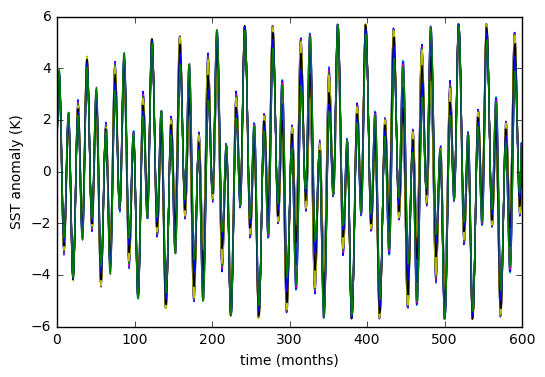

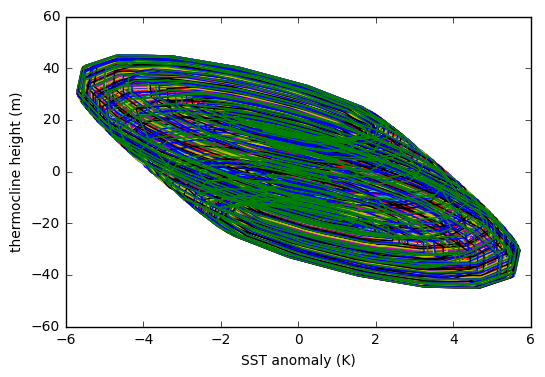

In [16]:
ensemble(Tmid=0.15,hmid=0.0,dT=0.01,dh=0.01,mu0=0.75,nt=600,f_ann=0.0,f_ran=0.5,epsilon=0.1,mu_ann=0.)



increasing random forcing makes it chaotic- orbits cover all of phase space